In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [3]:
train_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


**Data information, checking missing values and data description**

In [4]:
train_df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,38000.000000,38000.000000,38000.000000,38000.000000,22919.000000,38000.000000,38000.000000,38000.000000
mean,19000.500000,1732.998842,44.860211,42.722395,2.432392,15.112289,14181.819774,0.238632
std,10969.799451,1425.165034,17.324897,17.321885,1.027355,6.342908,6600.185168,0.426253
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,9500.750000,521.000000,28.000000,27.000000,1.000000,12.000000,9226.000000,0.000000
50%,19000.500000,1388.500000,44.000000,40.000000,3.000000,17.000000,13180.000000,0.000000
75%,28500.250000,2675.000000,59.000000,57.000000,3.000000,20.000000,18090.000000,0.000000
max,38000.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
train_df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator            8720
Holding_Policy_Duration    15081
Holding_Policy_Type        15081
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       38000 non-null  int64  
 1   City_Code                38000 non-null  object 
 2   Region_Code              38000 non-null  int64  
 3   Accomodation_Type        38000 non-null  object 
 4   Reco_Insurance_Type      38000 non-null  object 
 5   Upper_Age                38000 non-null  int64  
 6   Lower_Age                38000 non-null  int64  
 7   Is_Spouse                38000 non-null  object 
 8   Health Indicator         29280 non-null  object 
 9   Holding_Policy_Duration  22919 non-null  object 
 10  Holding_Policy_Type      22919 non-null  float64
 11  Reco_Policy_Cat          38000 non-null  int64  
 12  Reco_Policy_Premium      38000 non-null  float64
 13  Response                 38000 non-null  int64  
dtypes: float64(2), int64(6

# EDA :

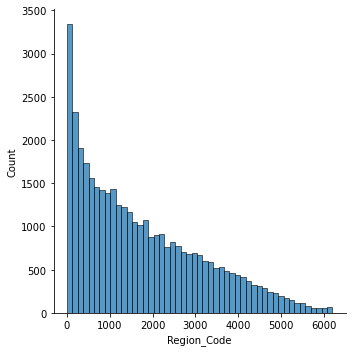

In [7]:
sns.displot(train_df['Region_Code'])

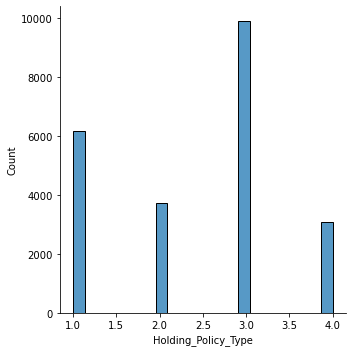

In [8]:
sns.displot(train_df['Holding_Policy_Type'])

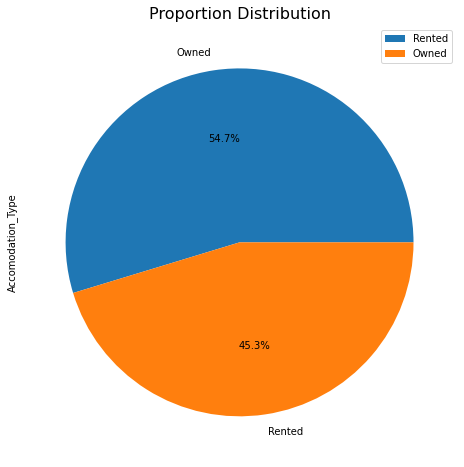

In [9]:
figure = plt.figure(figsize=[8, 8])
train_df['Accomodation_Type'].value_counts().plot.pie(autopct='%3.1f%%')

plt.legend(['Rented', 'Owned'])
plt.title(label='Proportion Distribution', size=16)
plt.show()

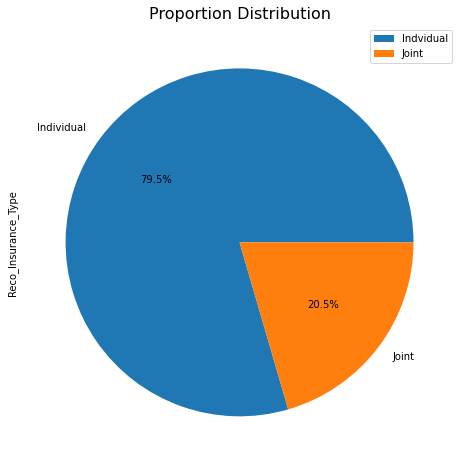

In [10]:
figure = plt.figure(figsize=[8, 8])
train_df['Reco_Insurance_Type'].value_counts().plot.pie(autopct='%3.1f%%')

plt.legend(['Indvidual', 'Joint'])
plt.title(label='Proportion Distribution', size=16)
plt.show()

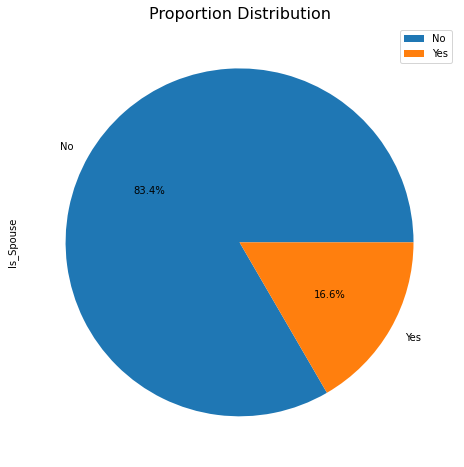

In [11]:
figure = plt.figure(figsize=[8, 8])
train_df['Is_Spouse'].value_counts().plot.pie(autopct='%3.1f%%')

plt.legend(['No', 'Yes'])
plt.title(label='Proportion Distribution', size=16)
plt.show()

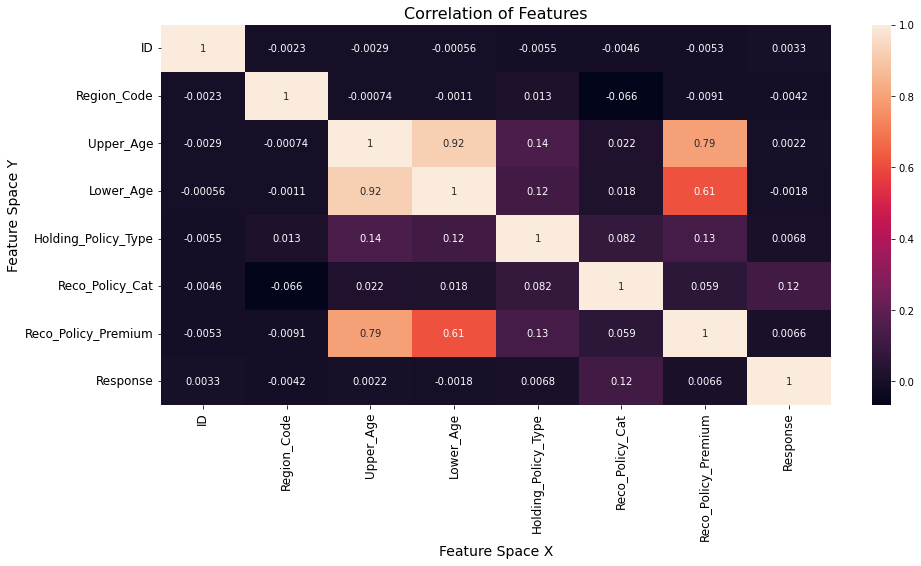

In [12]:
figure = plt.figure(figsize=[15, 7])
sns.heatmap(data = train_df.corr(), annot=True)

plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

**Imputing missing values and Outliers :**

In [13]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [14]:
train_df['City_Code'] = Le.fit_transform(train_df['City_Code'])

In [15]:
train_df['City_Code'].unique()

array([22, 31, 16, 34, 35,  0,  6, 20, 19, 33, 12, 17, 30, 11, 27,  1,  8,
        9,  7, 21, 26, 18, 10, 32,  3,  4,  2,  5, 14, 15, 13, 29, 25, 23,
       28, 24])

In [16]:
train_df['Holding_Policy_Duration'] = train_df['Holding_Policy_Duration'].replace('14+',15.0)
train_df['Holding_Policy_Duration'].replace(np.nan, train_df['Holding_Policy_Duration'].mode()[0],inplace = True)
train_df['Holding_Policy_Duration'] = train_df['Holding_Policy_Duration'].astype(float)

In [17]:
train_df['Holding_Policy_Duration'].unique()

array([15.,  1.,  3.,  5.,  9., 14.,  7.,  2., 11., 10.,  8.,  6.,  4.,
       13., 12.])

In [18]:
train_df['Health Indicator'].replace(np.nan, train_df['Health Indicator'].mode()[0],inplace = True)

In [19]:
train_df['Holding_Policy_Type'].replace(np.nan, train_df['Holding_Policy_Type'].mode()[0], inplace = True)

In [20]:
train_df.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [22]:
train_df['Health Indicator'] = Le.fit_transform(train_df['Health Indicator'])

In [23]:
train_df['Accomodation_Type']=train_df['Accomodation_Type'].map({'Rented':0, 'Owned':1})
train_df['Accomodation_Type'].value_counts()

1    20786
0    17214
Name: Accomodation_Type, dtype: int64

In [24]:
train_df['Reco_Insurance_Type'] = train_df['Reco_Insurance_Type'].map({'Individual':0, 'Joint':1})

In [25]:
train_df['Is_Spouse'] = train_df['Is_Spouse'].map({'No':0, 'Yes':1})

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       38000 non-null  int64  
 1   City_Code                38000 non-null  int32  
 2   Region_Code              38000 non-null  int64  
 3   Accomodation_Type        38000 non-null  int64  
 4   Reco_Insurance_Type      38000 non-null  int64  
 5   Upper_Age                38000 non-null  int64  
 6   Lower_Age                38000 non-null  int64  
 7   Is_Spouse                38000 non-null  int64  
 8   Health Indicator         38000 non-null  int32  
 9   Holding_Policy_Duration  38000 non-null  float64
 10  Holding_Policy_Type      38000 non-null  float64
 11  Reco_Policy_Cat          38000 non-null  int64  
 12  Reco_Policy_Premium      38000 non-null  float64
 13  Response                 38000 non-null  int64  
dtypes: float64(3), int32(2

ID


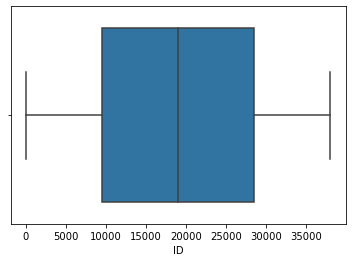

City_Code


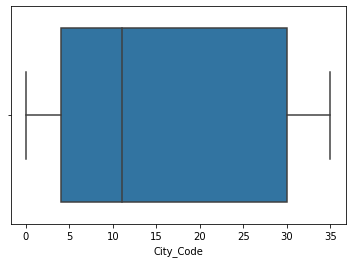

Region_Code


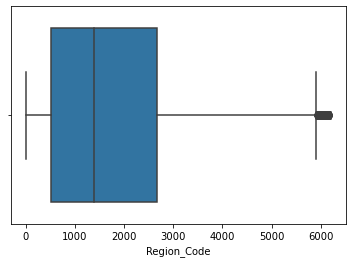

Accomodation_Type


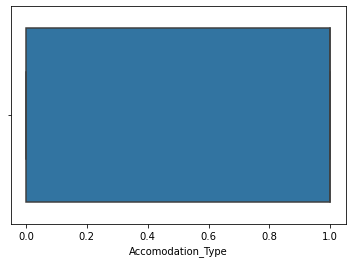

Reco_Insurance_Type


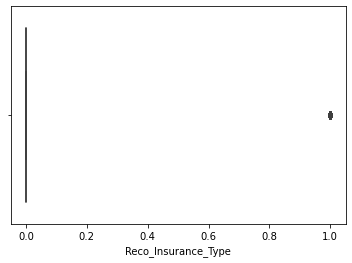

Upper_Age


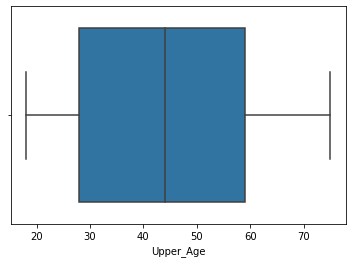

Lower_Age


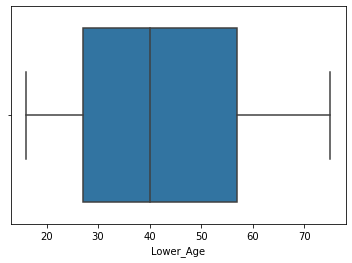

Is_Spouse


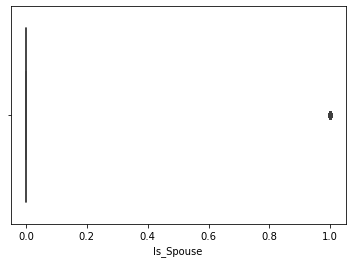

Health Indicator


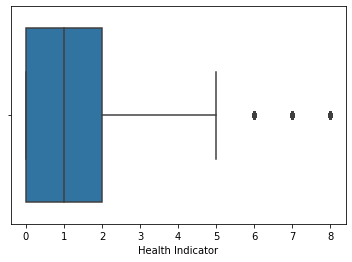

Holding_Policy_Duration


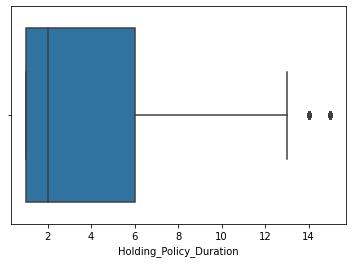

Holding_Policy_Type


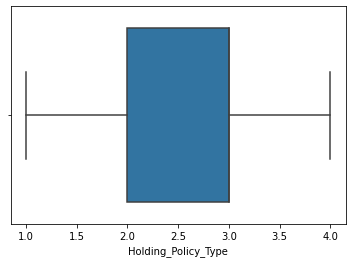

Reco_Policy_Cat


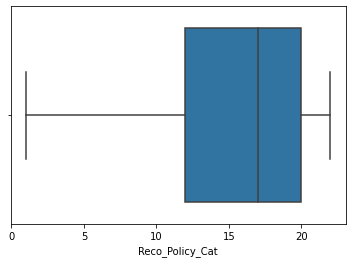

Reco_Policy_Premium


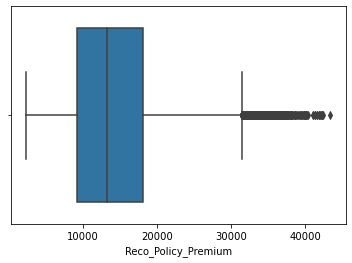

In [27]:
for col in train_df.iloc[:, :-1].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df)
    plt.show()

In [28]:
def Outlier(var):
    for x in var.iloc[:, :-1].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_train = Outlier(train_df)

ID


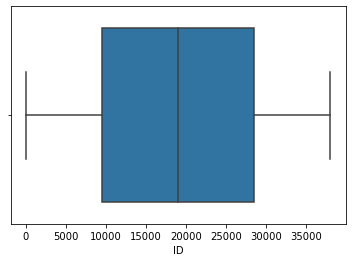

City_Code


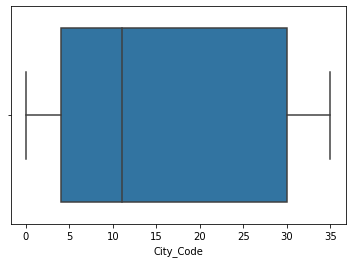

Region_Code


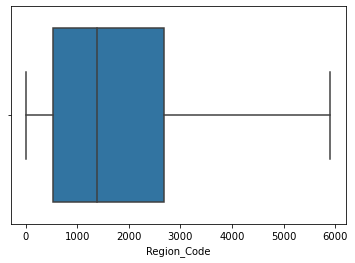

Accomodation_Type


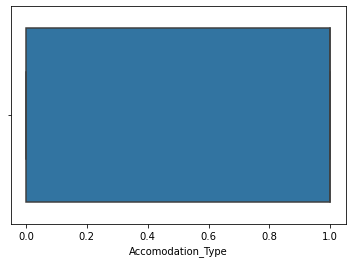

Reco_Insurance_Type


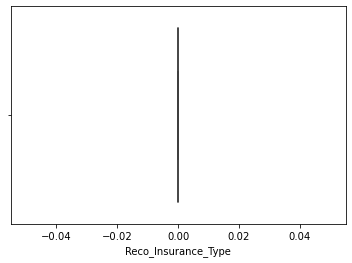

Upper_Age


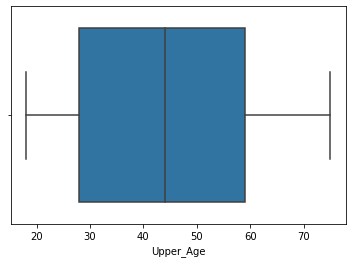

Lower_Age


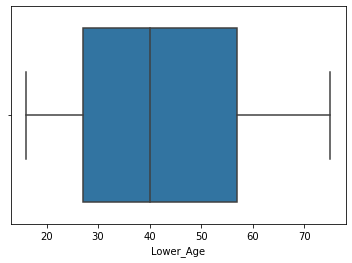

Is_Spouse


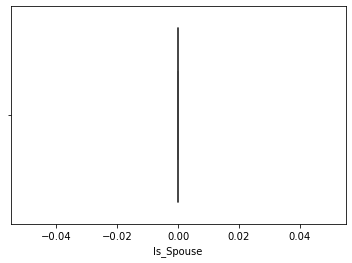

Health Indicator


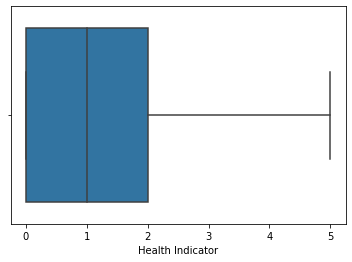

Holding_Policy_Duration


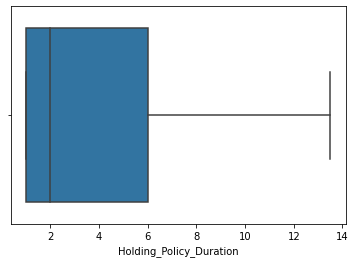

Holding_Policy_Type


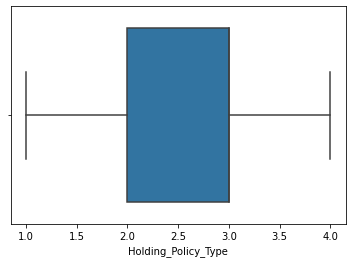

Reco_Policy_Cat


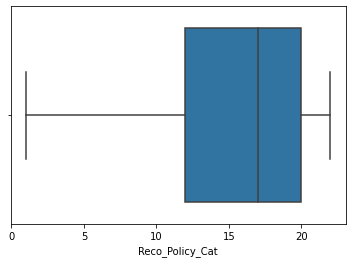

Reco_Policy_Premium


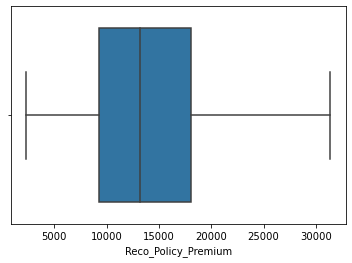

In [29]:
for col in df_train.iloc[:, :-1].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = df_train)
    plt.show()

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       38000 non-null  float64
 1   City_Code                38000 non-null  float64
 2   Region_Code              38000 non-null  float64
 3   Accomodation_Type        38000 non-null  float64
 4   Reco_Insurance_Type      38000 non-null  float64
 5   Upper_Age                38000 non-null  float64
 6   Lower_Age                38000 non-null  float64
 7   Is_Spouse                38000 non-null  float64
 8   Health Indicator         38000 non-null  float64
 9   Holding_Policy_Duration  38000 non-null  float64
 10  Holding_Policy_Type      38000 non-null  float64
 11  Reco_Policy_Cat          38000 non-null  float64
 12  Reco_Policy_Premium      38000 non-null  float64
 13  Response                 38000 non-null  int64  
dtypes: float64(13), int64(

**Train Test Split :**

In [31]:
x = df_train.iloc[:,1:13 ]
y = df_train['Response']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26600, 12)
(11400, 12)
(26600,)
(11400,)


**Logistic Regression :**

In [35]:
from sklearn.linear_model import LogisticRegression

In [43]:
Lr = LogisticRegression(max_iter = 10000, class_weight = 'balanced')

In [44]:
Lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [45]:
#predicting on train data
y_pred_train = Lr.predict(x_train)
y_pred_train

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [46]:
#predicting on test data
y_pred_test = Lr.predict(x_test)
y_pred_test

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

In [48]:
print('Binary Output Logistic Reg', metrics.accuracy_score(y_pred_test, y_test),'\n')
print(metrics.classification_report(y_test, y_pred_test))

Binary Output Logistic Reg 0.47596491228070176 

              precision    recall  f1-score   support

           0       0.81      0.41      0.54      8673
           1       0.27      0.69      0.39      2727

    accuracy                           0.48     11400
   macro avg       0.54      0.55      0.46     11400
weighted avg       0.68      0.48      0.51     11400



In [49]:
print('Confusion Matrix','\n', metrics.confusion_matrix(y_test, y_pred_test))

Confusion Matrix 
 [[3554 5119]
 [ 855 1872]]


In [50]:
from sklearn.metrics import f1_score

In [76]:
#f1-score on test data
f1_score(y_test, y_pred_test )

0.3852644577073472

In [52]:
test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,38001,C15,620,Rented,Joint,65,29,No,X4,NaN,NaN,19,30768.0
1,38002,C3,28,Owned,Individual,39,39,No,X4,4,2.0,16,13618.0
2,38003,C2,777,Owned,Individual,33,33,No,X4,1,2.0,3,6740.0
3,38004,C8,2737,Owned,Joint,28,25,Yes,NaN,NaN,NaN,8,9135.0
4,38005,C1,863,Owned,Individual,43,43,No,X2,5,4.0,18,12760.0


In [53]:
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].replace('14+',15.0)
test_df['Holding_Policy_Duration'].replace(np.nan, test_df['Holding_Policy_Duration'].mode()[0],inplace = True)
test_df['Holding_Policy_Duration'] = test_df['Holding_Policy_Duration'].astype(float)

In [54]:
test_df['Health Indicator'].replace(np.nan, test_df['Health Indicator'].mode()[0],inplace = True)

In [55]:
test_df['Holding_Policy_Type'].replace(np.nan, test_df['Holding_Policy_Type'].mode()[0], inplace = True)

In [56]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [57]:
test_df['Health Indicator'] = Le.fit_transform(test_df['Health Indicator'])

In [58]:
test_df['Accomodation_Type']=test_df['Accomodation_Type'].map({'Rented':0, 'Owned':1})


In [59]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [60]:
test_df['City_Code'] = Le.fit_transform(test_df['City_Code'])

In [61]:
test_df['Is_Spouse'] = test_df['Is_Spouse'].map({'No':0, 'Yes':1})

In [62]:
test_df['Reco_Insurance_Type'] = test_df['Reco_Insurance_Type'].map({'Individual':0, 'Joint':1})

In [63]:
test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,38001,6,620,0,1,65,29,0,3,1.0,3.0,19,30768.0
1,38002,22,28,1,0,39,39,0,3,4.0,2.0,16,13618.0
2,38003,11,777,1,0,33,33,0,3,1.0,2.0,3,6740.0
3,38004,34,2737,1,1,28,25,1,0,1.0,3.0,8,9135.0
4,38005,0,863,1,0,43,43,0,1,5.0,4.0,18,12760.0


In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12882 entries, 0 to 12881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       12882 non-null  int64  
 1   City_Code                12882 non-null  int32  
 2   Region_Code              12882 non-null  int64  
 3   Accomodation_Type        12882 non-null  int64  
 4   Reco_Insurance_Type      12882 non-null  int64  
 5   Upper_Age                12882 non-null  int64  
 6   Lower_Age                12882 non-null  int64  
 7   Is_Spouse                12882 non-null  int64  
 8   Health Indicator         12882 non-null  int32  
 9   Holding_Policy_Duration  12882 non-null  float64
 10  Holding_Policy_Type      12882 non-null  float64
 11  Reco_Policy_Cat          12882 non-null  int64  
 12  Reco_Policy_Premium      12882 non-null  float64
dtypes: float64(3), int32(2), int64(8)
memory usage: 1.2 MB


In [65]:
test_df.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

ID


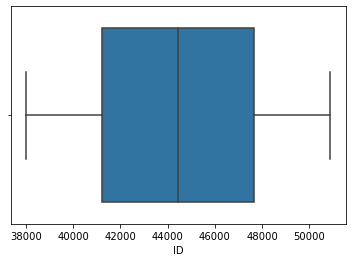

City_Code


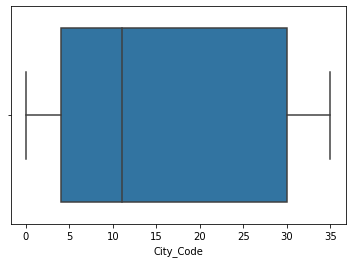

Region_Code


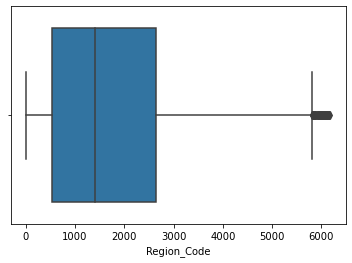

Accomodation_Type


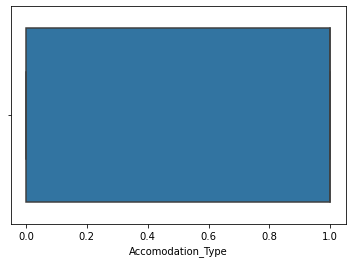

Reco_Insurance_Type


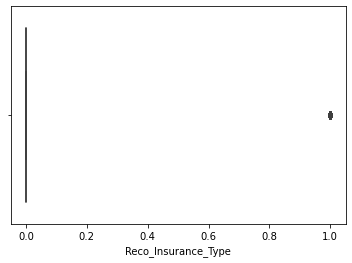

Upper_Age


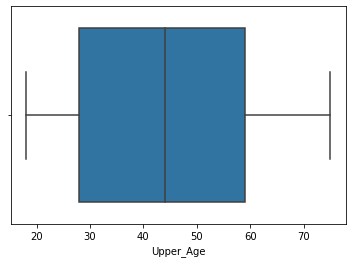

Lower_Age


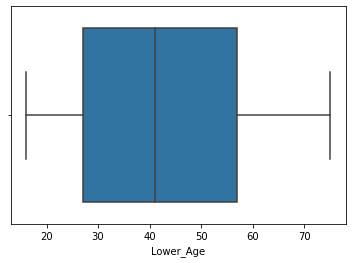

Is_Spouse


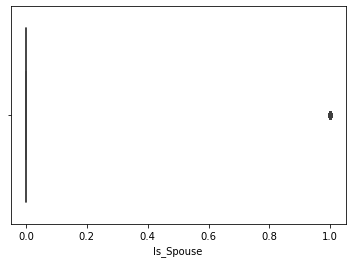

Health Indicator


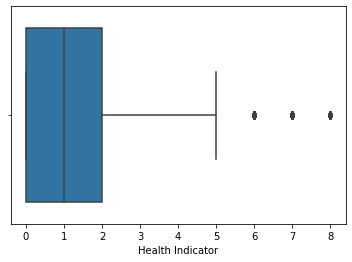

Holding_Policy_Duration


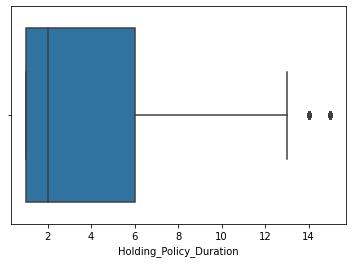

Holding_Policy_Type


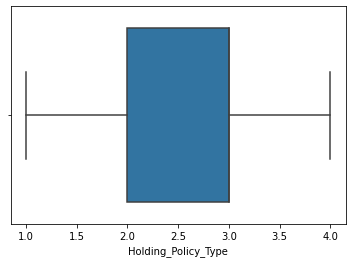

Reco_Policy_Cat


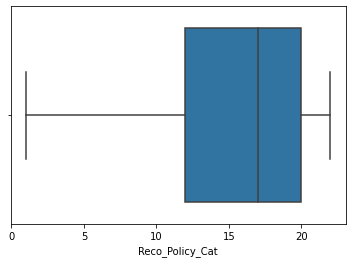

In [66]:
for col in test_df.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=test_df[col],data=test_df)
    plt.show()

In [67]:
df_test = Outlier(test_df)

ID


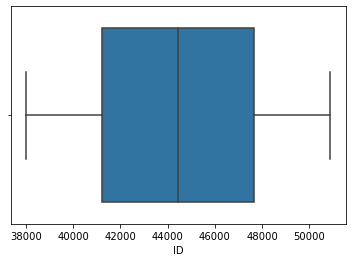

City_Code


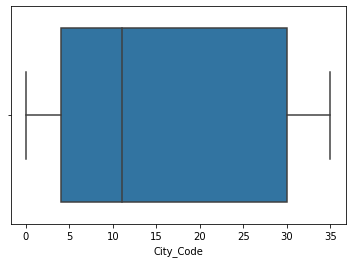

Region_Code


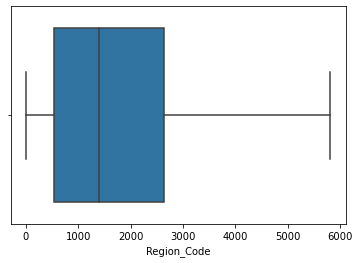

Accomodation_Type


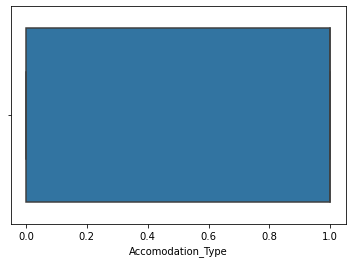

Reco_Insurance_Type


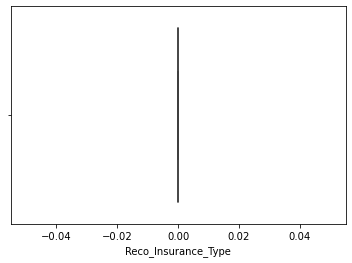

Upper_Age


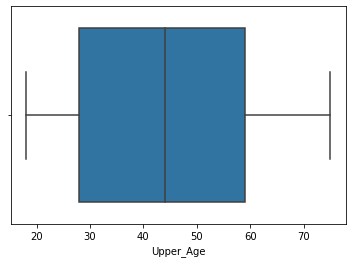

Lower_Age


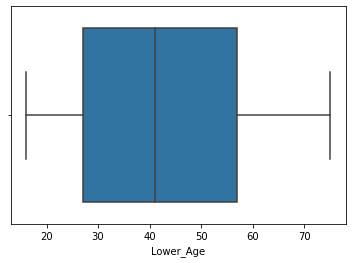

Is_Spouse


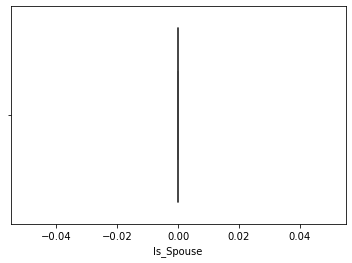

Health Indicator


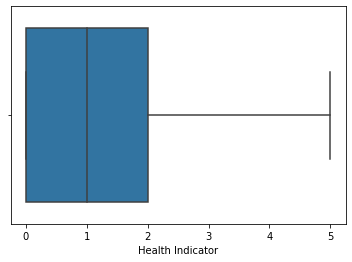

Holding_Policy_Duration


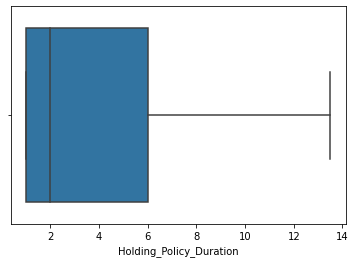

Holding_Policy_Type


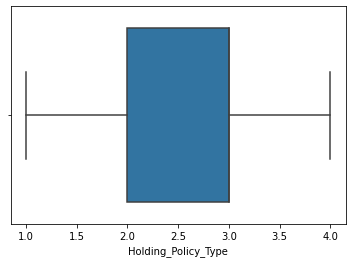

Reco_Policy_Cat


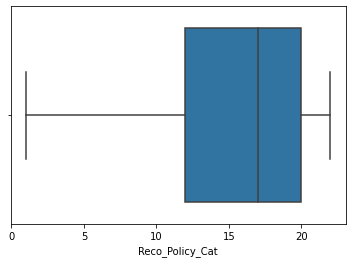

In [68]:
for col in df_test.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=df_test[col],data=df_test)
    plt.show()

In [69]:
df_test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,38001.0,6.0,620.0,0.0,0.0,65.0,29.0,0.0,3.0,1.0,3.0,19.0,30768.0
1,38002.0,22.0,28.0,1.0,0.0,39.0,39.0,0.0,3.0,4.0,2.0,16.0,13618.0
2,38003.0,11.0,777.0,1.0,0.0,33.0,33.0,0.0,3.0,1.0,2.0,3.0,6740.0
3,38004.0,34.0,2737.0,1.0,0.0,28.0,25.0,0.0,0.0,1.0,3.0,8.0,9135.0
4,38005.0,0.0,863.0,1.0,0.0,43.0,43.0,0.0,1.0,5.0,4.0,18.0,12760.0


In [70]:
test_1 = df_test.iloc[:, 1:]

In [71]:
predicted_test = Lr.predict(test_1)

In [72]:
predicted_test

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [73]:
df_test['Response Status'] = predicted_test

In [74]:
df_test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response Status
0,38001.0,6.0,620.0,0.0,0.0,65.0,29.0,0.0,3.0,1.0,3.0,19.0,30768.0,1
1,38002.0,22.0,28.0,1.0,0.0,39.0,39.0,0.0,3.0,4.0,2.0,16.0,13618.0,1
2,38003.0,11.0,777.0,1.0,0.0,33.0,33.0,0.0,3.0,1.0,2.0,3.0,6740.0,0
3,38004.0,34.0,2737.0,1.0,0.0,28.0,25.0,0.0,0.0,1.0,3.0,8.0,9135.0,0
4,38005.0,0.0,863.0,1.0,0.0,43.0,43.0,0.0,1.0,5.0,4.0,18.0,12760.0,1


In [75]:
df_test.to_csv('Submission_health_insurance_prediction.csv', index = False, header = False)